## Importing the Dataset

Importing necessary libraries for data analysis

In [90]:
import pandas as pd
from pandas import DataFrame
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

Importing .csv in our dataframe

In [91]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
{
    "age" : "Age",
    "lived" : "Survived",
    "name" : "Name",
    "ID" : "PassengerId",
    "sex" : "Sex"
}

{'age': 'Age',
 'lived': 'Survived',
 'name': 'Name',
 'ID': 'PassengerId',
 'sex': 'Sex'}

---

Before we dive (pun intended :p ) in the actual data analysis, we need to take a look at the missing values in our dataset. We're also going to explore some strategies to fill those holes.

## Exploring Missing Values

In [93]:
DataFrame(df.isna().sum(), columns=['']).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,0,0,0,0,0,177,0,0,0,0,687,2


As we can see most columns don't have missing values (only Age and Embarked).

Considering that Age is actually an important demographic information for our research, later in the notebook, we will try to recover as much data as we can with an informed approach. 

---

## Feature Analysis

Importing dictionary in the dataset.

In [94]:
df_dict = pd.read_csv('data/dictionary.csv')
display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Let's review the type of variables we have right now.

<style>
  table {
    margin: 0;
    width: 80%; 
  }
  td {
    text-align: left;
    /*padding: 8px;*/
  }
  th
  {
    text-align: left;
  }
</style>

<table>
    <tr>
        <td><b>Categoricals</b>: 
            <ul>
                <li>Sex (male/female);</li>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Embarked (port);</li>
                <li>Survived (true/false).</li>
            </ul> 
        </td>
        <td><b>Ordinals</b>:
            <ul>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Sibsp (siblings+spouse);</li>
                <li>Parch (parents+children).</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td><b>Continual</b>:
            <ul>
                <li>Age;</li>
                <li>Fare (price of ticket).</li>
            </ul>
        </td>
        <td><b>Everything else</b>:
            <ul>
                <li>PassengerId;</li>
                <li>Name;</li>
                <li>Cabin.</li>
            </ul>
        </td>
    </tr>
</table>


---

## Survived

### Survival analysis (categorical variable)

Here, we're going to explore the most important variable for our analysis: how many people survived and how many didn't. The column 'Survived' serves as the dependent variable, determining the all outcome we're focusing on.

In [95]:
df_survived = df['Survived'].value_counts(dropna=False)
df_survived

Survived
0    549
1    342
Name: count, dtype: int64

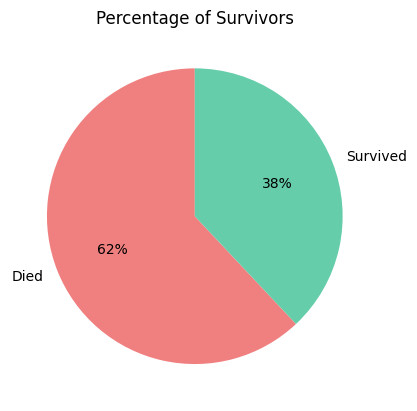

In [96]:
# DATA
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
values = list(df_survived_relative)

# COLORS
died_color = "#F08080" # (light coral)
survived_color = "#66CDAA" # (medium aqua marine)

# CHART
plt.pie(values, labels=["Died", "Survived"], colors=[died_color, survived_color], autopct='%1.f%%',startangle=90)
plt.title('Percentage of Survivors')
plt.show()

From the survivor analysis, we can see that the majority of passengers did not survive.

Many lives were lost due to the insufficient number of lifeboats (Source: British Inquiry, 1912 https://www.titanicinquiry.org/ ).

To understand this further, we'll explore how survival rates differed between males and females.

---

## Sex

### Analysis of Sex gender relations (Categorical Variable).

#### Relation between sex gender and survival rates

In [97]:
gender_survived = df.groupby(by=['Sex', 'Survived'])['Survived'].count()

pivot_table = gender_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']
pivot_table

,Sex,Died,Survived,Total
0,female,81,233,314
1,male,468,109,577


Let's analyse the data with some graphs.

In the first one let's see how many male survived and how many females. Maybe chivalry made a difference in survival rate?

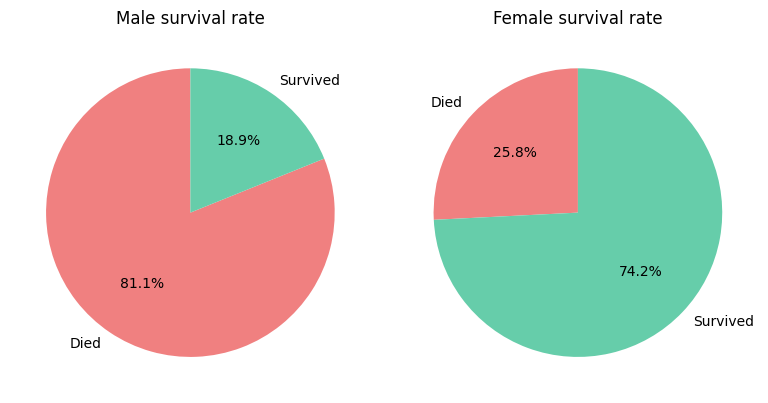

In [118]:
# DATA 
male_Survived = gender_survived.get('male')
female_Survived = gender_survived.get('female')

# CHART
plt.figure(figsize=(8, 4)) 
male_survived = gender_survived.get('male')

plt.subplot(1, 2, 1)
plt.title("Male survival rate")
plt.pie(male_Survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[died_color, survived_color], startangle=90)

female_survived = gender_survived.get('female')

plt.subplot(1, 2, 2)
plt.title("Female survival rate")
plt.pie(female_Survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[died_color, survived_color], startangle=90)

plt.tight_layout()
plt.show()

In the following graph we're going to show the relation between gender and survival rate in the bigger scheme.

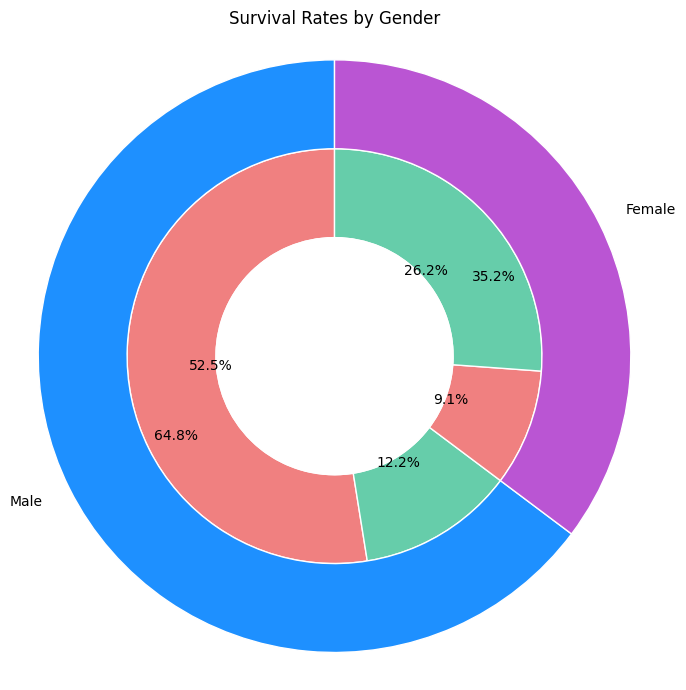

In [119]:
# DATA
# Inner ring data: Male died/survived ; Female died/survived 
Sex_Survived_values = [
    male_Survived.get(0), male_Survived.get(1),
    female_Survived.get(0),  female_Survived.get(1)]

# Outer ring data: Male / Female percentage on board
df_sex_on_board = df['Sex'].value_counts()
percentage_sex_on_board = df['Sex'].value_counts(dropna=False, normalize=True) *100
sex_on_board_values = list(percentage_sex_on_board)

# COLORS
female_color = "#BA55D3" #(medium orchid)
male_color = "#1E90FF" #(dodger blue)

# CAHRT
fig, ax = plt.subplots(figsize=(7, 7))

# Inner ring 
ax.pie(Sex_Survived_values, 
       colors=[died_color, survived_color], 
       radius=0.7, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       autopct='%1.1f%%', 
       startangle=90)

# Outer ring
ax.pie(sex_on_board_values,
       colors=[male_color, female_color], 
       labels=["Male", "Female"], 
       radius=1, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       autopct='%1.1f%%', 
       startangle=90)

# Circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title('Survival Rates by Gender')

plt.tight_layout()
plt.show()

In [ ]:
# AGGIUSTARE LABELS DEL GRAFICO

In summary, we can observe a significant disparity in survival rates between genders aboard the Titanic.
 
Women had a markedly higher survival rate compared to men. Apparently chivarly did make a difference!

Historically, the Titanic followed a "women and children first" protocol during evacuation, which significantly influenced the survival outcomes. According to reports, a far higher percentage of women and children were saved compared to men, as lifeboats were prioritized for them. You can read more about this in The Titanic: A Survivor’s Story source https://www.encyclopedia-titanica.org/ .

To understand this further, we'll explore how survival rates differed between males and females with children or without.

---

## Parch

### Analysis of the childrens aboard (Ordinal Variable).

First let's anlayse the distribution of children on board

In [143]:
df_parch =  df.groupby(by=['Parch', 'Survived'])['Survived'].count()
df_parch

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

From these results we can observe that most people had no children on board. 

Let's analize if people with children survived more or not.

<Axes: xlabel='Parch'>

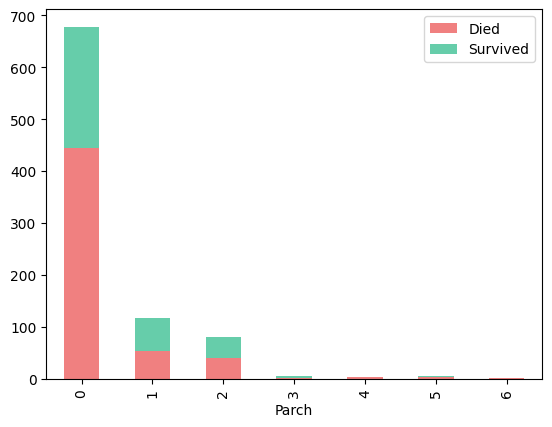

In [152]:
df['Died'] = 1 - df['Survived']
df.groupby('Parch').sum()[['Died','Survived']].plot.bar(stacked=True,color=[died_color, survived_color])

From these analysis we can deduce that 2/3 of people without children died, while around half of people with children saved themself.

So the "women and children first" protocol continues to emerge in our analysis.

Let's dive deeper in our analysis to undersdan the patterns.

---

## Pclass


### Analysis of Ticket Class relations (Categorical Variable).

#### Possible analysis tasks:
- Survival Rates: Compare survival rates across different classes.
- Fare Analysis: Analyze the relationship between class and fare paid.
- Cabin Analysis: Examine the distribution of cabin types across different classes.
- Embarkation Port Analysis: Analyze the relationship between class and embarkation port.

#### Relation between travel class and survival rates

In [102]:
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

pivot_table = class_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']
pivot_table

,Pclass,Died,Survived,Total
0,1,80,136,216
1,2,97,87,184
2,3,372,119,491


And again here's some graph and tables, this time showing the survival rate between passenger class. Does the amount paid for the ticket made a difference?

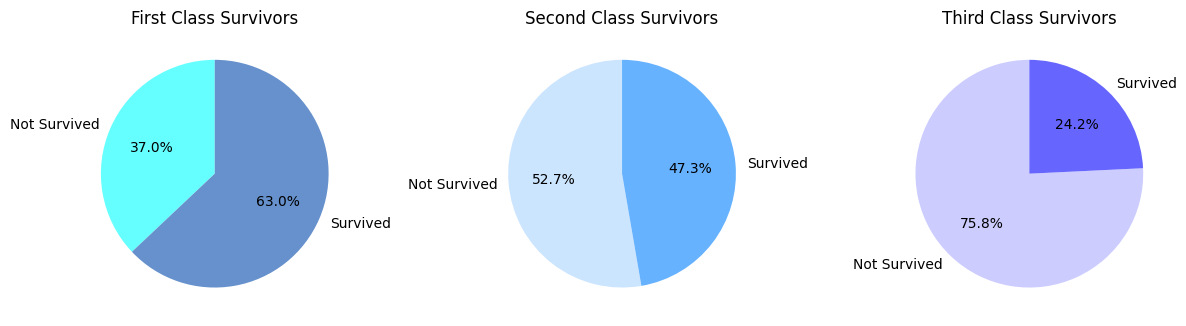

In [103]:
first_class_colors = ["#6691CC", "#99FFFF", "#66FFFF"] # (3 shades of light blue)
second_class_colors = ["#66B2FF", "#99CCFF", "#CCE5FF"] # (3 shades of blue)
third_class_colors = ["#6666FF", "#9999FF", "#CCCCFF"] # (3 shades of dark blue/violet)

class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

plt.figure(figsize=(12, 4))

# First class
plt.subplot(1, 3, 1)
first_class = class_survived.get(1)
plt.title("First Class Survivors")
plt.pie(first_class, labels=["Not Survived", "Survived"], autopct='%1.1f%%', colors=[first_class_colors[2], first_class_colors[0]],startangle=90)

# Second class
plt.subplot(1, 3, 2)
second_class = class_survived.get(2)
plt.title("Second Class Survivors")
plt.pie(second_class, labels=["Not Survived", "Survived"], autopct='%1.1f%%', colors=[second_class_colors[2], second_class_colors[0]],startangle=90)

# Third class
plt.subplot(1, 3, 3)
third_class = class_survived.get(3)
plt.title("Third Class Survivors")
plt.pie(third_class, labels=["Not Survived", "Survived"], autopct='%1.1f%%', colors=[third_class_colors[2], third_class_colors[0]],startangle=90)

plt.tight_layout()
plt.show()

Let's assume that a more expensive passenger class corresponds a higher social status. 

From what we can see, most of the first class survived while most of the third class died.

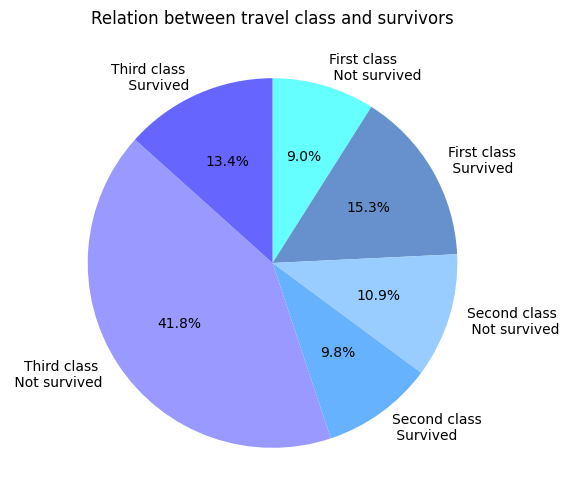

In [104]:
pivot_data = df.pivot_table(index='Pclass', columns='Survived', aggfunc='size')
pivot_data.index = ["First class", "Second class", "Third class"]
pivot_data.columns = ["Not survived", "Survived"]

# Flatten the pivot table into a new DataFrame
flat_data = pivot_data.stack()
flat_df = pd.DataFrame({'Category': flat_data.index, 'Count': flat_data.values})

# Plot the flat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    flat_df['Count'], 
    labels=[
        "First class \n Not survived",
        "First class \n Survived", 
        "Second class \n Not survived",
        "Second class \n Survived",
        "Third class \n Not survived",
        "Third class \n Survived"],
    autopct='%1.1f%%',
    colors= [first_class_colors[2],first_class_colors[0], 
             second_class_colors[1], second_class_colors[0],
             third_class_colors[1], third_class_colors[0]],
             counterclock=False,
             startangle=90) 

plt.title('Relation between travel class and survivors')
plt.show()


From these graphs, we can infer that social rank was a determining factor in survival.

But does the class also influenced gender survival?

---

## Relation between Sex and Pclass

In [105]:
# Gender and Class colors:
female_first_class_colors = ["#FF3333","#FF6666", "#FF9999", "#FFCCCC"] # (4 shades of red)
female_second_class_colors = ["#FF9933" ,"#FFB266", "#FFCC99", "#FFE5CC"] # (4 shades of orange)
female_third_class_colors = ["#FFFF33","#FFFF66", "#FFFF99", "#FF99CC"] # (4 shades of yellow)
male_first_class_colors = ["#99FF33", "#B2FF66", "#CCFF99", "#E599CC"] # (4 shades of light green)
male_second_class_colors = ["#33FF33", "#66FF66", "#99FF99", "#CC99CC"] # (4 shades of green)
male_third_class_colors = ["#33FF99", "#66FFB2", "#99FFCC", "#CC99E5"] # (4 shades of dark blue/green)

In [106]:
gender_class_survived = df.groupby(by=['Sex', 'Pclass', 'Survived' ])['Survived'].count()
gender_class_survived

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

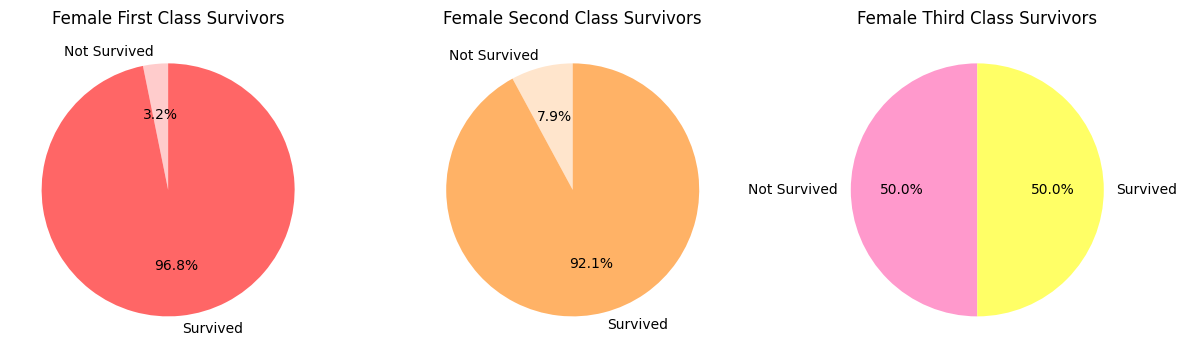

In [107]:
# Create pie charts for each Pclass
plt.figure(figsize=(12, 4))  # Adjust figure size for better visualization

# Female First class
plt.subplot(1, 3, 1)
female_first_class = gender_class_survived.get("female")[1]
plt.title("Female First Class Survivors")
plt.pie(
    female_first_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[female_first_class_colors[3],female_first_class_colors[1]],
    startangle=90,
        )

# Female Second class
plt.subplot(1, 3, 2)
female_second_class = gender_class_survived.get("female")[2]
plt.title("Female Second Class Survivors")
plt.pie(
    female_second_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[female_second_class_colors[3],female_second_class_colors[1]],
    startangle=90,
        )

# Female Third class
plt.subplot(1, 3, 3)
female_third_class = gender_class_survived.get("female")[3]
plt.title("Female Third Class Survivors")
plt.pie(
    female_third_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[female_third_class_colors[3],female_third_class_colors[1]],
    startangle=90,
        )

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

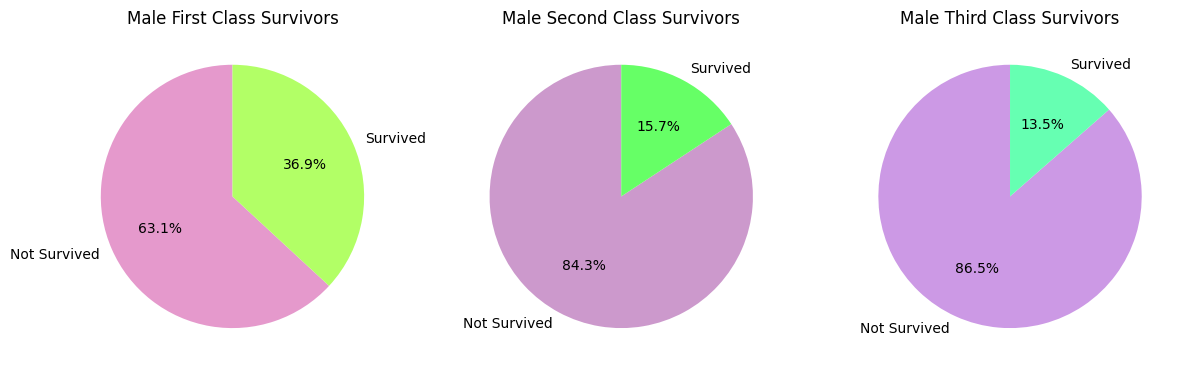

In [108]:
plt.figure(figsize=(12, 4))  # Adjust figure size for better visualization

# Male First class
plt.subplot(1, 3, 1)
male_first_class = gender_class_survived.get("male")[1]
plt.title("Male First Class Survivors")
plt.pie(
    male_first_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[male_first_class_colors[3], male_first_class_colors[1]],
    startangle=90,
        )

# Male Second class
plt.subplot(1, 3, 2)
male_secod_class = gender_class_survived.get("male")[2]
plt.title("Male Second Class Survivors")
plt.pie(
    male_secod_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[male_second_class_colors[3], male_second_class_colors[1]],
    startangle=90,
        )

# Male Third class
plt.subplot(1, 3, 3)
male_third_class = gender_class_survived.get("male")[3]
plt.title("Male Third Class Survivors")
plt.pie(
    male_third_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[male_third_class_colors[3], male_third_class_colors[1]],
    startangle=90,
        )

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

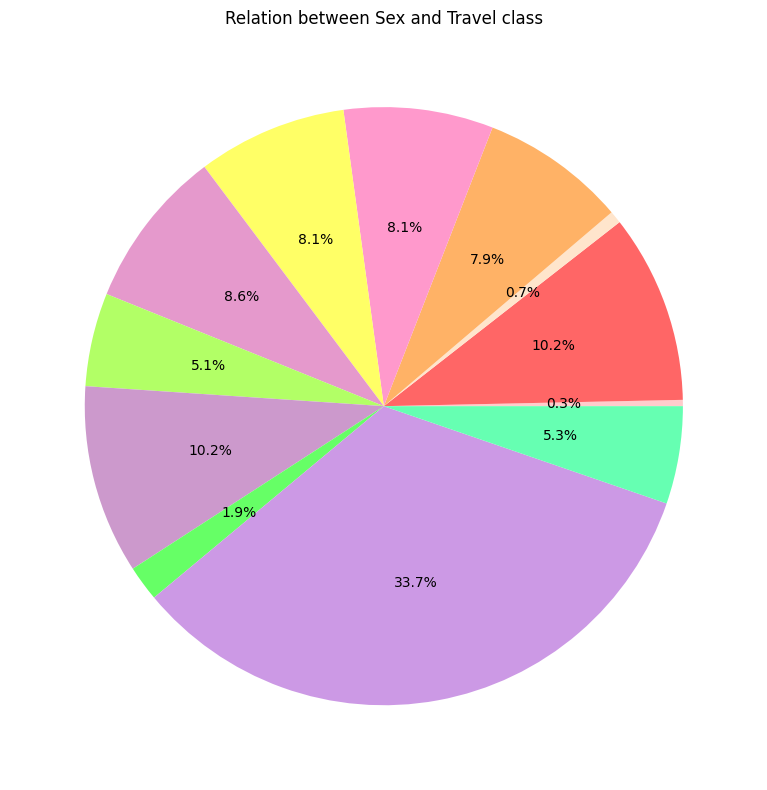

In [109]:
# Count
class_gender_survived = df.groupby(by=['Sex', 'Pclass', 'Survived'])['Survived'].count()

# Create pie charts for each Pclass
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization

# First class
first_class = class_survived.get([1,2,3,'male', 'felmae'])
plt.title("Relation between Sex and Travel class")
plt.pie(class_gender_survived, 
        autopct='%1.1f%%', 
        colors=[
            female_first_class_colors[3],female_first_class_colors[1],
            female_second_class_colors[3],female_second_class_colors[1],
            female_third_class_colors[3],female_third_class_colors[1],
            male_first_class_colors[3],male_first_class_colors[1],
            male_second_class_colors[3],male_second_class_colors[1],
            male_third_class_colors[3],male_third_class_colors[1],
        ],
        #startangle=90,
        #counterclock=False
        )

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

---

## 8. Age

<Axes: title={'center': 'Passengers Age'}, xlabel='Age', ylabel='Frequency'>

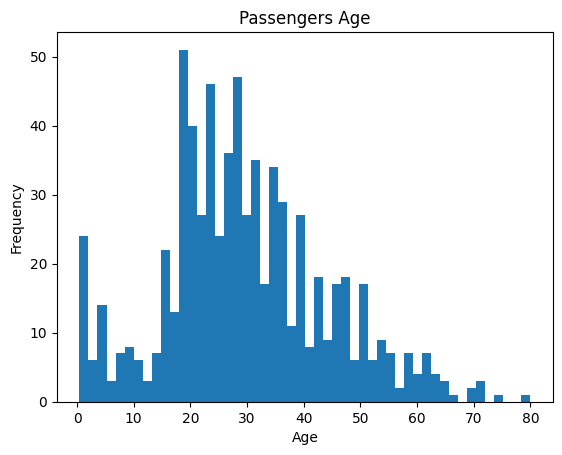

In [110]:
#media
#mediana
##moda
#minimo
#massimo

df["Age"].max()
df["Age"].min()
df["Age"].mean()
df["Age"].median()

df["Age"].plot(kind="hist", bins = 50, title="Passengers Age", xlabel="Age", ylabel="Frequency")

In [111]:
df
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [112]:
def extract_title(name):
    pieces_of_name = name.split()
    for word in pieces_of_name:
        if '.' in word:
            return word

df['Title'] = df['Name'].apply(extract_title)
df['Title'].value_counts()

averages = df[['Title', 'Age']].groupby('Title').mean()
df = df.join(averages, rsuffix='avg', on="Title")
df['AgeFilled'] = df['Age'].fillna(value=df['Ageavg'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ageavg,AgeFilled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,32.368090,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35.898148,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,21.773973,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,35.898148,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,32.368090,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,43.166667,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,21.773973,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,21.773973,21.773973
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,32.368090,26.000000


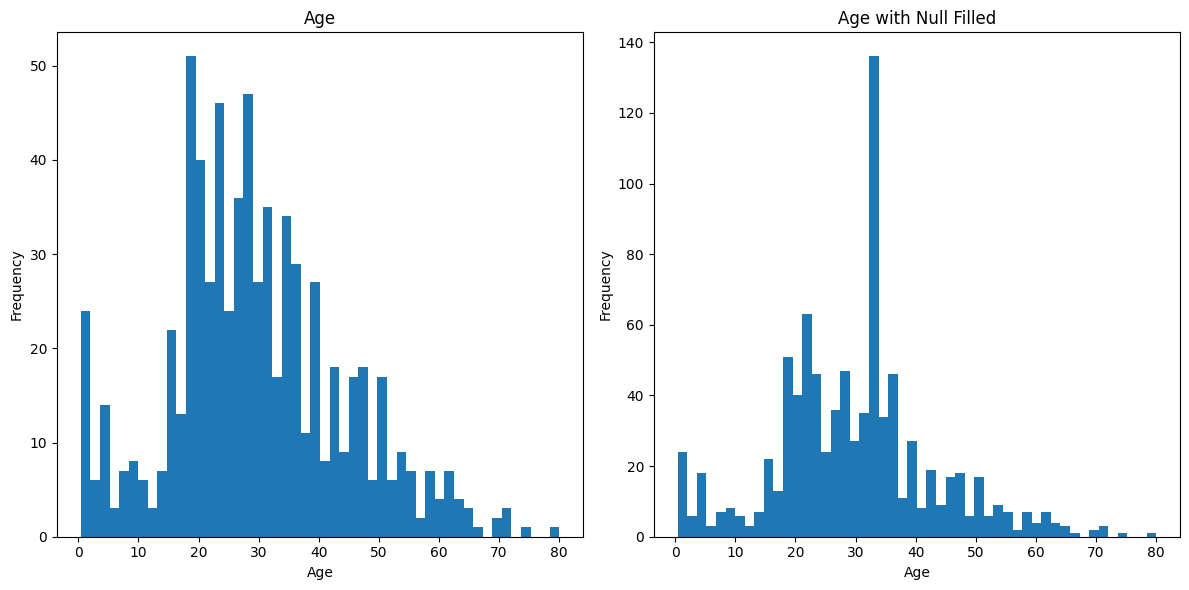

In [113]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

plt.subplot(1, 2, 1)
plt.title("Age")
plt.hist(df["Age"], bins=50)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Age with Null Filled")
plt.hist(df['AgeFilled'], bins=50)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

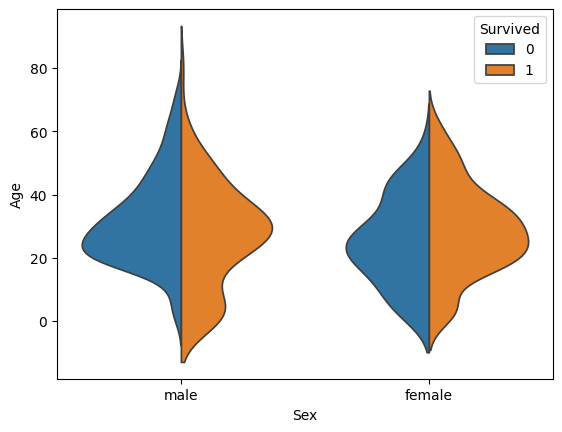

In [114]:
sns.violinplot(df, y="Age", x="Sex", split=True, hue="Survived", inner=None)

<Axes: xlabel='Pclass', ylabel='Age'>

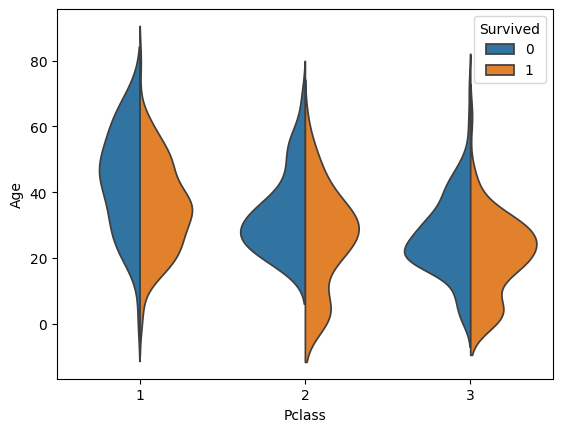

In [115]:
sns.violinplot(df, y="Age", x="Pclass", split=True, hue="Survived", inner=None)

Text(0, 0.5, 'Gender')

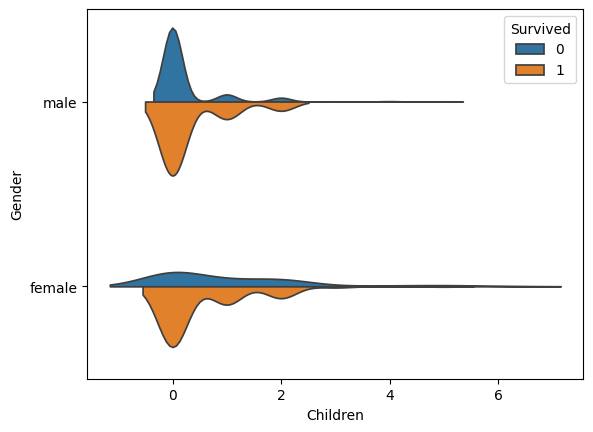

In [116]:
children_plot = sns.violinplot(df, y="Sex", x="Parch", split=True, hue="Survived", inner=None)
children_plot.set_xlabel("Children")
children_plot.set_ylabel("Gender")

##### Having a child seems to became a "nuisance" for women, as the lower the women with children, the higher the survival percentage was.